In [77]:
from kaleido.scopes.plotly import PlotlyScope
import optuna
import plotly
import plotly.express as px
import pandas as pd
import numpy as np
import imp  
import optuna_custom_plots as cplot
imp.reload(cplot)
import plotly.graph_objects as go
study = optuna.create_study(study_name='Symmetric_Linear_BeatAutoencoder', storage='sqlite:///optuna_symmetric_linear_bae.db',load_if_exists=True)

params = [k for k in optuna.importance.get_param_importances(study)]


#custom color
icy=['rgb(0,0,0)','rgb(50,50,140)','rgb(70,70,160)','rgb(110,110,200)','rgb(130,130,210)',
     'rgb(150,150,230)', 'rgb(170,170,255)','rgb(190,190,255)',
     'rgb(200,200,255)','rgb(210,210,255)','rgb(220,220,255)','rgb(240,240,255)']
icy_r=icy.copy()
icy_r.reverse()

[I 2020-09-15 14:14:09,178] Using an existing study with name 'Symmetric_Linear_BeatAutoencoder' instead of creating a new one.
/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:61: ExperimentalWarning:

get_param_importances is experimental (supported from v1.3.0). The interface can change in the future.

/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:83: ExperimentalWarning:

MeanDecreaseImpurityImportanceEvaluator is experimental (supported from v1.5.0). The interface can change in the future.



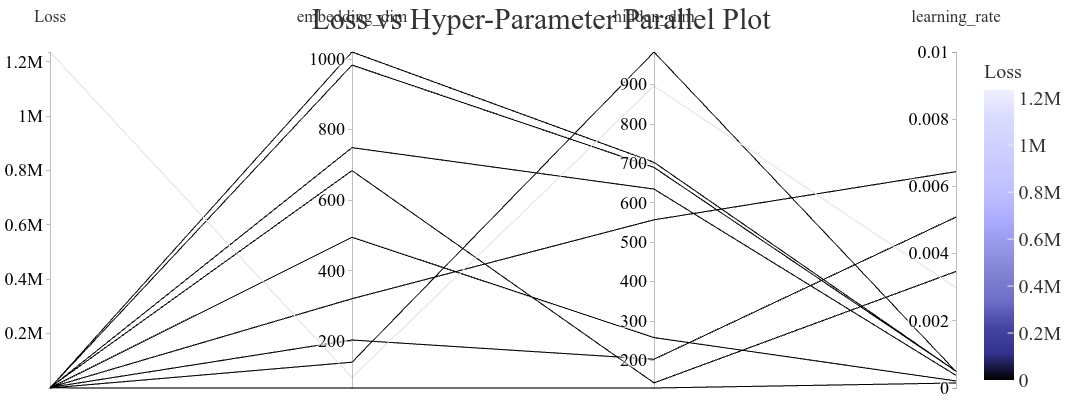

In [78]:
imp.reload(cplot)
fig=cplot.get_parallel_coordinate_plot(study,coloring=icy,log_loss=False,simple_ticks=["Time Steps", "Latent Size", "Frequency Bins"])
scope = PlotlyScope()
fig= fig.update_layout(   
    autosize=False,title_text='Loss vs Hyper-Parameter Parallel Plot', title_x=0.5, title_y=0.98, 
    template="ggplot2",
    width=1000,
    height=400,
    font_family="Times New Roman",
    font_size=20,
    title_font_family="Times New Roman",
    title_font_size=30,           
       margin=dict(l=50, t=50,r=1,  b=10),
    )

with open("parallel_coord.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=1000,height=400,))
fig

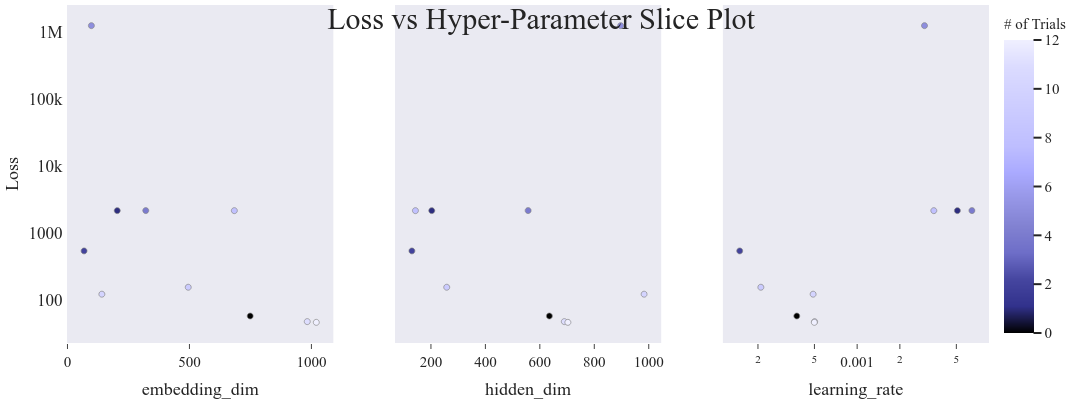

In [79]:
imp.reload(cplot)
fig=cplot.get_slice_plot(study,objective_value="Loss",log_loss=True)
fig.update_layout(
    autosize=False,title_text='Loss vs Hyper-Parameter Slice Plot', title_x=0.5, title_y=0.98,
    template="seaborn",
    width=1100,height=400,
    font_family="Times New Roman",
    font_size=15,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=5,r=1,  b=10),                                   
    )

fig.update_xaxes(showgrid=False,zeroline=False,tickangle=0, tickfont=dict(size=15),)

fig.update_yaxes(showgrid=False,tickangle=0, tickfont=dict(size=17),dtick=1)

fig.update_traces(marker=dict(colorscale=icy))

with open("slice_plot.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=1100,height=420,))

fig


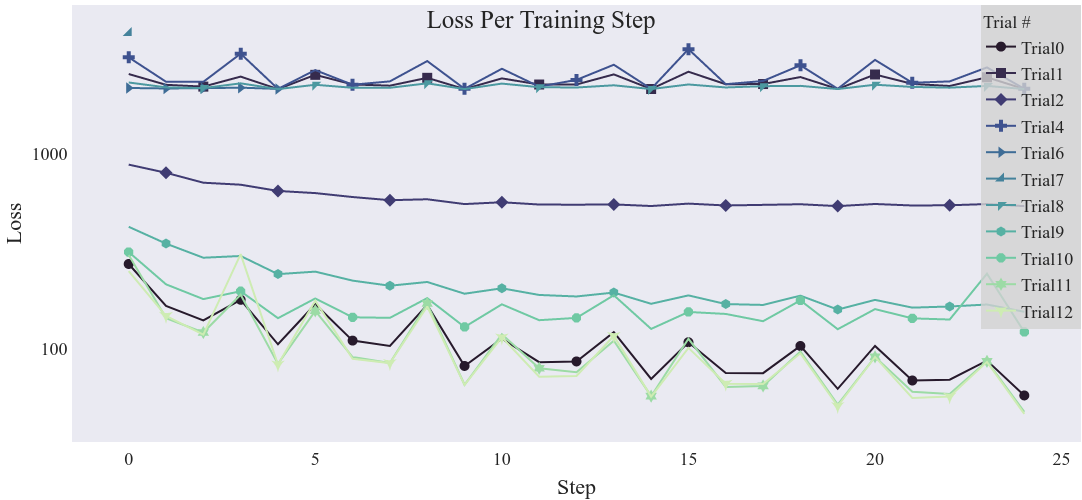

In [114]:
imp.reload(cplot)
scope = PlotlyScope()

#max_experiments = None for all experiments

fig=cplot.get_intermediate_plot(study,max_experiments=11,max_num_steps=30,color_scale=px.colors.sequential.deep_r)
fig.update_layout(
    autosize=False,title_text='Loss Per Training Step',  title_x=0.5, title_y=0.98, yaxis_type="log",
    template="seaborn",
width=900,height=500,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=25,
    margin=dict(l=0, t=5,r=1,  b=1),
    legend_title_text="Trial #",
                  legend=dict(
                      bgcolor='rgba(210,210,210,0.8)',
                  orientation="v",
                yanchor="top",
                y=1,
                xanchor="right",x=1)
    )
fig.update_xaxes(showgrid=False,zeroline=False,)
fig.update_yaxes(showgrid=False,title_text="Loss",dtick=1)



with open("loss_per_training.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=1000,height=500,))
fig

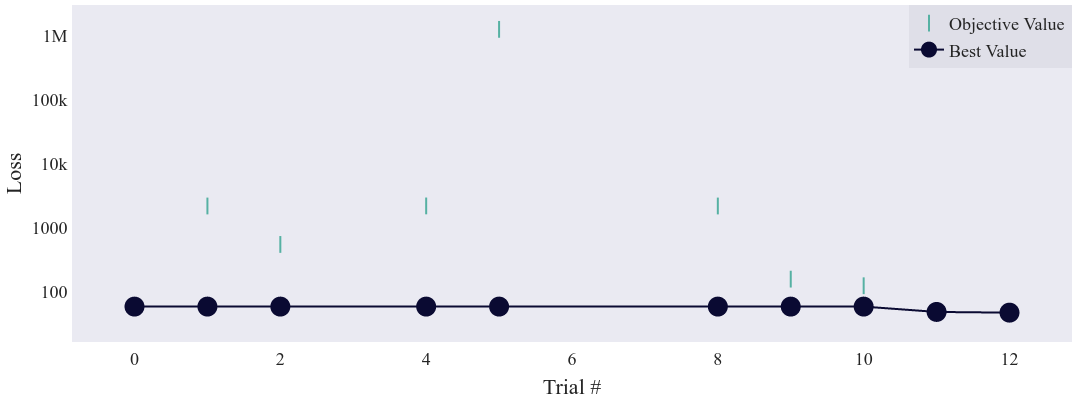

In [89]:
imp.reload(cplot)
fig = cplot.get_optimization_history_plot(study)
fig.update_layout(
    autosize=False,title_text='Optimization History', title=None, title_x=0.5, title_y=0.98, yaxis_type="log",
    template="seaborn",
    width=800,
    height=400,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=28,
    
     margin=dict( r=10, l=10, b=0, t=5),
    
              legend=dict(
                  bgcolor='rgba(220,220,230,0.8)',
                  orientation="v",
                yanchor="top",
                y=1,
                xanchor="right",x=1)
    )


fig.update_xaxes(showgrid=False,zeroline=False,title_text="Trial #")

fig.update_yaxes(showgrid=False,title_text="Loss",dtick=1)
with open("Optimization_History.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=800,height=500,  ))

fig

/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:61: ExperimentalWarning:

get_param_importances is experimental (supported from v1.3.0). The interface can change in the future.

/home/asalimi/miniconda3/lib/python3.7/site-packages/optuna/_experimental.py:83: ExperimentalWarning:

MeanDecreaseImpurityImportanceEvaluator is experimental (supported from v1.5.0). The interface can change in the future.



OrderedDict([('learning_rate', 0.4140108225204016), ('hidden_dim', 0.3150487076286239), ('embedding_dim', 0.27094046985097453)])


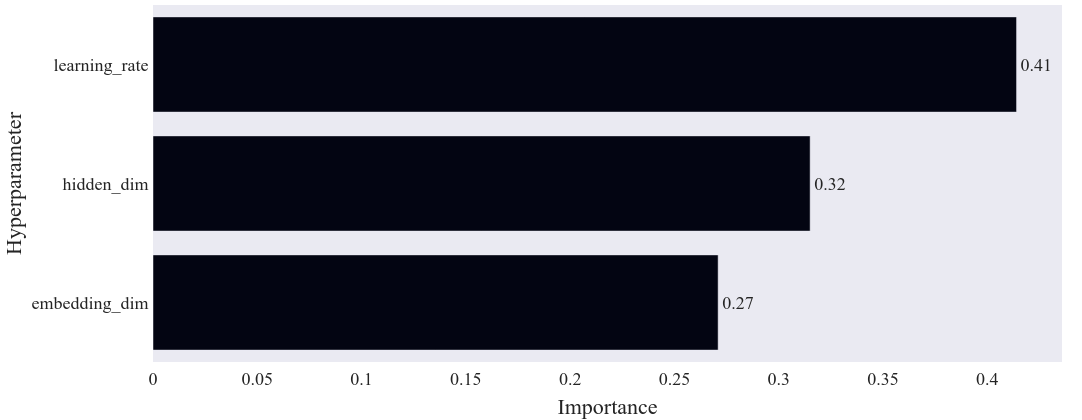

In [88]:
imp.reload(cplot)
importances=optuna.importance.get_param_importances(study,params=[p for p in params if p!=""])
fig=cplot.plot_param_importances(importances,study)
fig.update_layout(
    autosize=False,title_text='Hyper-Parameter Importances', title=None, title_x=0.5, title_y=0.98,
    template="seaborn",
    width=800,height=420,
    font_family="Times New Roman",
    font_size=18,
    title_font_family="Times New Roman",
    title_font_size=30,
    margin=dict(l=0, t=5,r=20,  b=1),                                   
    )
fig.update_xaxes(showgrid=False,zeroline=False,)
fig.update_yaxes(showgrid=False,zeroline=False,)
with open("ParameterImportances.pdf", "wb") as f:
    f.write(scope.transform(fig, format="pdf", width=800,height=400,))
fig

In [87]:
print('Best trial until now:')
print(' Value: ', study.best_trial.value)
print(' Params: ')
for key, value in study.best_trial.params.items():
    print(f'    {key}: {value}')
df=study.trials_dataframe()
df=df.sort_values(by=["value"],ascending=True).reset_index()
df[["value"]+["params_"+p for p in params]]


Best trial until now:
 Value:  46.3947868347168
 Params: 
    embedding_dim: 1020
    hidden_dim: 703
    learning_rate: 0.0004991334301091227


,value,params_embedding_dim,params_learning_rate,params_hidden_dim
0,4.639479e+01,1020,0.000499,703
1,4.758901e+01,983,0.000501,690
2,5.769783e+01,749,0.000376,635
3,1.220832e+02,141,0.000489,983
4,1.549416e+02,495,0.000210,258
5,5.396392e+02,68,0.000149,130
6,2.151103e+03,684,0.003469,143
7,2.151626e+03,204,0.005086,203
8,2.155017e+03,850,0.001757,68
9,2.157078e+03,321,0.006439,557
